In [1]:
# Neural networks that deals with the IMage data are referred to as CNN's.
# We take a matrix with some weights[which are learned by neural network] and apply them accross the entire image to get the
# desired result basically we ave the weights in a smaller matrix and we multiply that matrix, alongisde the given dimensions 
# to get the desired result, this distnace is known as stride distance.
# we can see a practical example at https://setosa.io/ev/image-kernels/
# the images are then modeified to get the values in between 0 to 255.
# In the context of cnn, filters are referred to as convolutional kernels and the process of passign and image over them is known
# as convolution.
# to protect the border information we make use of padding to apply 0's alongside the borders and therefore during multiploication of weights 
# in the matrix we donot loose much information.
# COnvolutional layers: -

# We see localized connections in CNN, which means that not all the neurons are fully connected but are connected to only a subset 
# of neurons in the next layer which end up making the weighted matrix or filters or image kernels.
# we observe densoe connections in ANN, whoch lead s to generation of a lot pf parameters for use to handle
# whereas in cnn we observe localized connections as shown below.

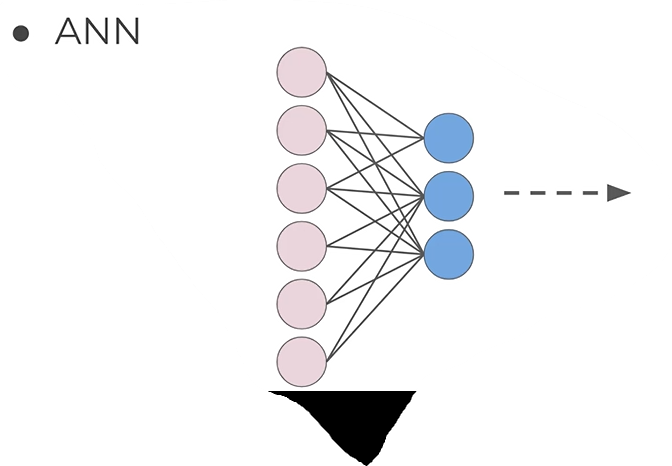
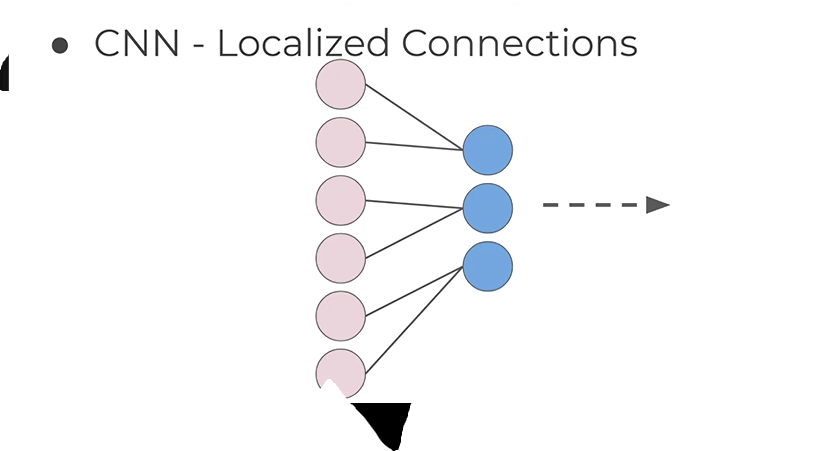

In [3]:
# These localized connections end bieng creating the filters and this figure out the best weights for the filters 
# we can multiple filter on the same layer for different purposes.
# Imaging a 2-d base neural netwrok below, this is with a stride distance of 2 layers.  
# and we can add as many filters as we want and we can stack these filters to get the convolutional layer and each of these filters have localized 
# connections and color images can be considered as an example fo 3-d matrix represenattion with R,G,B color in focus.
# RGB provides wide range of color, when mixed with differnt color intensities and we can basically get the 
# max color grid from these 3 colors only.
# For every image we will have 3 things height, width and color channels
# ususlly the images will only have the intensities inn gray value and when we combine these intensities we get 
# the complete image.
# The network only cares about the intensities channels that we have for these images.
# For a color imgae we will have 3 dimesional filter that we will have for each intesity of the color stacked on itself.
# we may ahve convolutional layer that feds into another covolution layer so as to leanr various patterns 

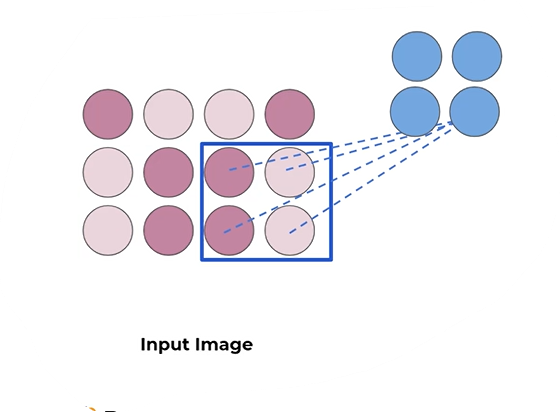
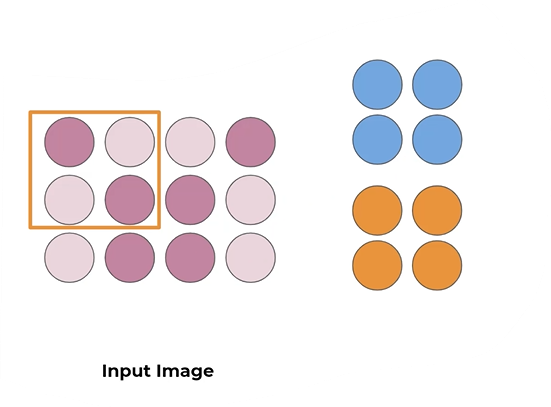
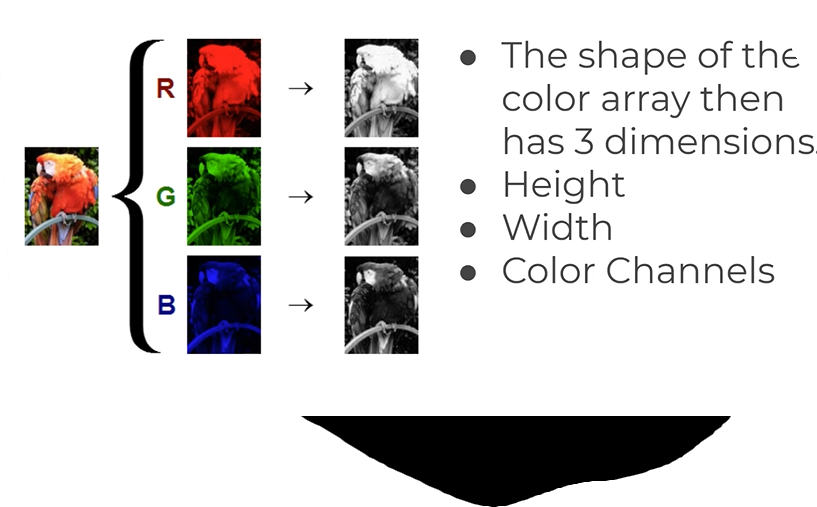
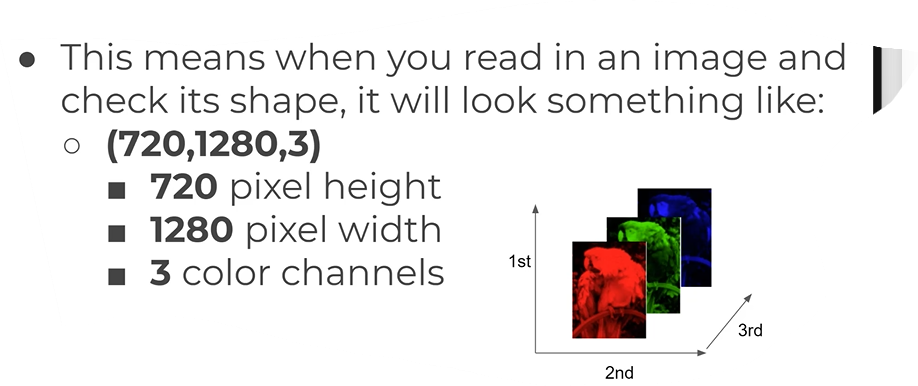
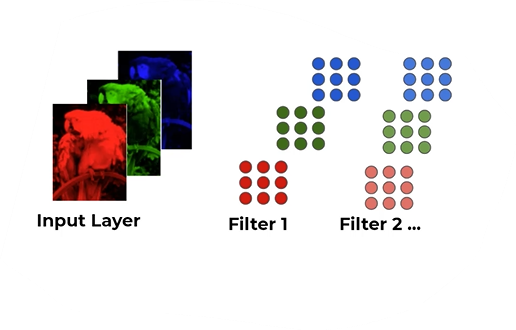

In [5]:
# Pooling Layers: -
# Pooling layers accept convolutional layers as input, subsampling or downsampling these layers is what, help 
# us reduce the size of these convolutional layers.
# using the mnethod below we reduce the size, we take a given window size and then select, the maximum value from it.
# we do loose some values but we may be able to keep some behaviour, like max pooling we can also use average pooling 
# so that we take average of the 4 values and get the new value instead of max but the average.

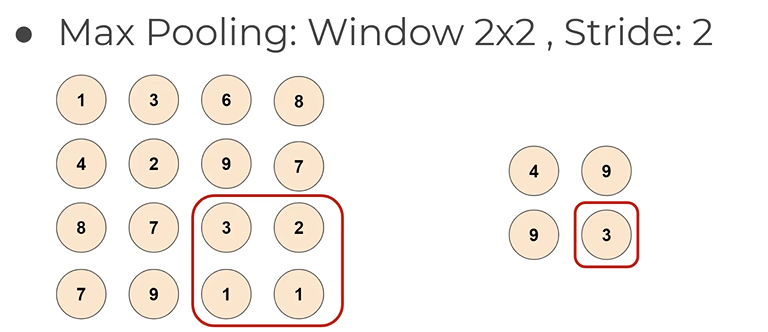

In [6]:
# Another way of dealing with this is to use the Dropout layer, It can be considered as a form of regularization to help prevent 
# overfitting, during training units are randomly dropped along with their connections.
# we have seen this layer in other codes.
# At the endof this layer where we connect all the layers and have the output to have the same numbers as input layers.

In a typical convolutional neural network (CNN), after applying the convolution operation with the first filter on the input image and calculating the feature map, the next step is usually to apply a non-linear activation function (such as ReLU) to introduce non-linearity to the model. After that, the feature map is often downsampled using a pooling layer (such as max pooling or average pooling) to reduce the spatial dimensions of the feature map and extract the most important features in a more robust way.

So to answer your question, we typically do not apply pooling directly to the input image itself, but rather to the feature map obtained from the convolution operation. The pooling layer operates on small local regions of the feature map and replaces the values in each region with a summary statistic (such as the maximum or average value), effectively downsampling the feature map while preserving the most salient features.

In [7]:
# Some CNN information from statsquest.[Explining how a trained CNN works, the only differenece is that we do know the filters as of 
# now while when we are training the filters are taken on their own]
# CNN reduce the number of input nodes 
# Tolerate small shifts in pixels
# Take advantage of the correlations that we observe in the complex images
# The filter that we are talking about comes after the training of the data on a given dataset.
# applying a Filter means that we are basically multiplying the entire image with a filter to and adding the bias term to the answer
# in order to get the Feature map, which help us take advantage of any correlations that we have in the image, after this the features
# are sent to the relu function, which makes all the negative value as 0 and keep only the positive values.
# Then on the gained feature map we then again apply the filter such that it doesn't overlap any other cells and we gain a small
# max pooled filter.
# AT this max pooling we are able to capture the most best parts in the image that captures most of the information.

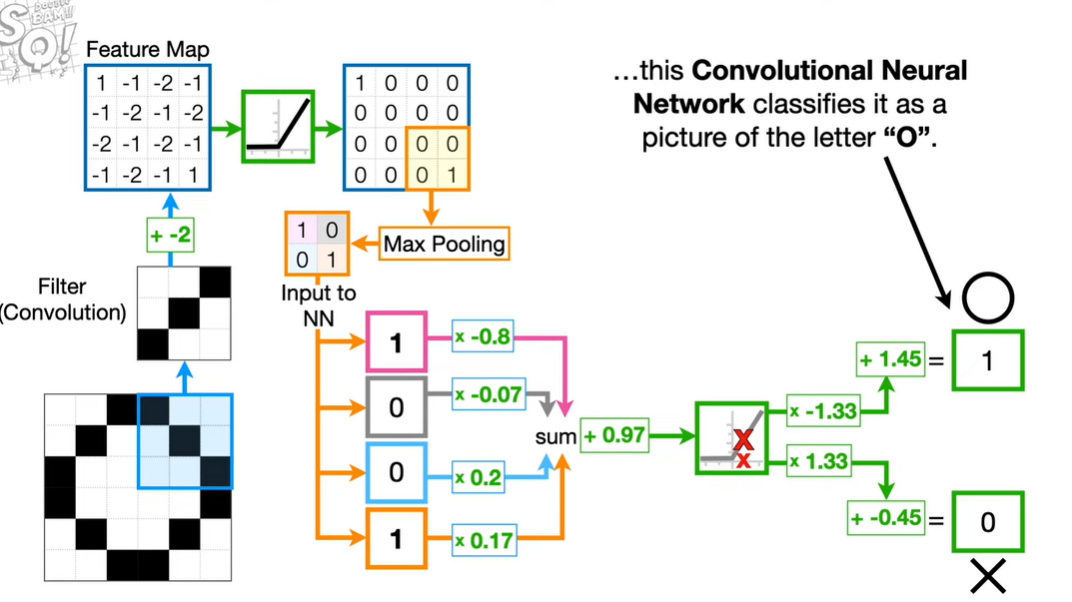

In [ ]:
# NO matter however the complex CNN is it will be gouing through filters,then egtting a feature amp and then applying an activation function
# and then pooling the output to reduce the size and then applying the neural netwrok to get the output.

In [ ]:
# Coding out our own COnvolutional Neural network, using the MNIST dataset.

In [128]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from tensorflow.keras.datasets import mnist,cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import os
from matplotlib.image import imread

In [65]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()  

In [46]:
x_train.shape# 60000 images with 28 pixels each. 

(60000, 28, 28)

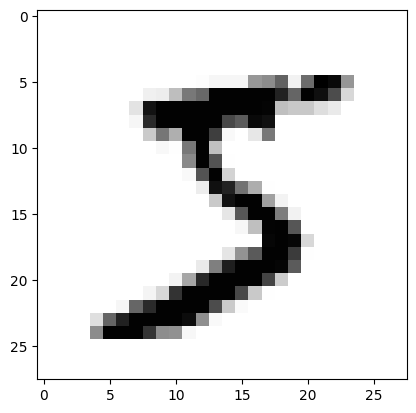

In [47]:
plt.imshow(x_train[0],cmap='Greys') # gray scaled as it os from 0 to 255.

In [48]:
y_train=to_categorical(y_train,10)
y_test= to_categorical(y_test,10)
# converted the data in one hot encoding.

In [49]:
# we need to sclae the data for us to not run into gradient vanishing problems.

In [50]:
# simple way is to just divide them by 255 
x_train=x_train/255
x_test=x_test/255
# we have sclaed the images 

In [51]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
# just reshaping the image sin 4d where the last value denotehs upto which range our values are,
# it basiclly represents the color channle whihc is just from 0 to 1.

In [52]:
model = Sequential()
# need to choose values of the filters, it is based of the complexity of the images.
# kernel size specifies the size of the window that slides over in an image.
# stride is the distance basically, by which the kernels based filters will slide over the image 
# as we have a smaller pixel based dataset we are just using the default(1,1)
# Incase of padding for conv2d, valid means that we donot need to apply the padding as the image 
# gets fully covered by the filter and stride you specified.
# And in our case we have the kernel size of 4 at 28 pixels image which gives us 28/7 = 4. which coincides perfectly 
# therefore we will not make use of save method, whereas save method will apply padding automatically 
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),padding='valid',input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))# poolsize is usually half the kernel size
model.add(Flatten())# if the images are 28*28 we flatten them out to 784 length of an array.
model.add(Dense(128,activation='relu'))
# output layer
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam')

In [53]:
early_stop=EarlyStopping(monitor='val_loss',patience=5)
# wait for 5 epochs 

In [54]:
model.fit(x_train,y_train,epochs=50,batch_size=16,validation_data=[x_test,y_test],callbacks=[early_stop])
# The model stopped tarining as we are able to get a good result.

Epoch 1/50
3750/3750 [==============================] - 19s 5ms/step - loss: 0.1201 - val_loss: 0.0566
Epoch 2/50
3750/3750 [==============================] - 19s 5ms/step - loss: 0.0436 - val_loss: 0.0555
Epoch 3/50
3750/3750 [==============================] - 18s 5ms/step - loss: 0.0261 - val_loss: 0.0529
Epoch 4/50
3750/3750 [==============================] - 18s 5ms/step - loss: 0.0164 - val_loss: 0.0392
Epoch 5/50
3750/3750 [==============================] - 18s 5ms/step - loss: 0.0122 - val_loss: 0.0449
Epoch 6/50
3750/3750 [==============================] - 18s 5ms/step - loss: 0.0092 - val_loss: 0.0609
Epoch 7/50
3750/3750 [==============================] - 19s 5ms/step - loss: 0.0069 - val_loss: 0.0529
Epoch 8/50
3750/3750 [==============================] - 19s 5ms/step - loss: 0.0060 - val_loss: 0.0584
Epoch 9/50
3750/3750 [==============================] - 19s 5ms/step - loss: 0.0053 - val_loss: 0.0584


In [55]:
# Model Evaluation: -
metrics=pd.DataFrame(model.history.history)

<Axes: >

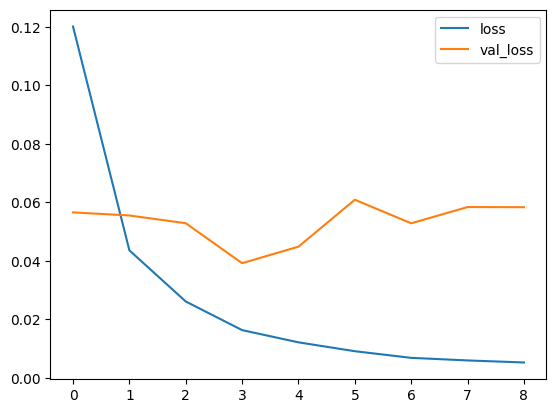

In [56]:
metrics.plot()

In [57]:
model.evaluate(x_test,y_test)
# we get the loss as 0.05 which is very less.

313/313 [==============================] - 1s 2ms/step - loss: 0.0584


0.058359697461128235

In [70]:
predict= model.predict(x_test) 
classes_x=np.argmax(predict,axis=1)

313/313 [==============================] - 1s 2ms/step


In [71]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.88      0.93      1135
           2       0.98      0.97      0.97      1032
           3       0.99      0.97      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.99      0.94      0.97      1028
           8       0.78      1.00      0.87       974
           9       0.99      0.94      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.97      0.96      0.96     10000
weighted avg       0.97      0.96      0.96     10000



In [72]:
print(confusion_matrix(y_test,classes_x))

[[973   0   1   0   0   0   3   0   3   0]
 [  0 996   7   1   1   0   3   0 127   0]
 [  3   1 997   1   1   0   2   2  25   0]
 [  0   0   0 975   0   6   0   2  27   0]
 [  0   0   0   0 971   0   6   0   5   0]
 [  1   0   1   9   0 862   8   0  11   0]
 [  0   1   1   0   2   1 943   0  10   0]
 [  0   1   7   0   8   0   0 969  38   5]
 [  1   0   0   0   0   0   0   0 973   0]
 [  3   1   0   1  16   8   0   1  34 945]]


In [73]:
# We are going to work on the CIFAR-10 Dataset with 32 by 32 images

# Color Dataset with 3 colors.

In [75]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()  

170498071/170498071 [==============================] - 8s 0us/step


In [76]:
x_train.shape

(50000, 32, 32, 3)

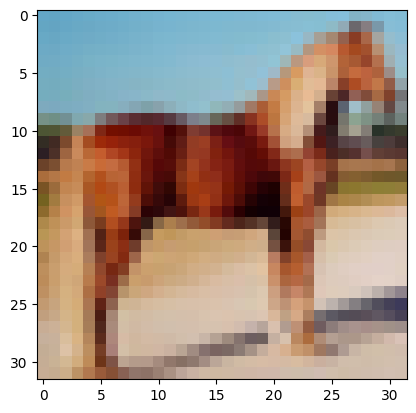

In [77]:
plt.imshow(x_train[43])
# gettinh the image of the horse

In [78]:
# the value goes from 0-255 so earch of the color chanlees
x_train=x_train/255
x_test=x_test/255

In [79]:
# converting the y values to one hot ecoding
y_test_cat= to_categorical(y_test)
y_train_cat= to_categorical(y_train)  
# the lables in y_test are all mentioned to as what they represent in the cifar-10 dataset.


In [80]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),padding='valid',input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),padding='valid',input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# we added more layers so that as this data is more complex compared to previous MNIST data.
model.add(Flatten())
model.add(Dense(256,activation='relu'))
# output layer
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam')

In [81]:
model.fit(x_train,y_train_cat,callbacks=[early_stop],epochs=20,validation_data=[x_test,y_test_cat])

Epoch 1/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5127 - val_loss: 1.2761
Epoch 2/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1863 - val_loss: 1.1292
Epoch 3/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0446 - val_loss: 1.0614
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9294 - val_loss: 1.0181
Epoch 5/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8383 - val_loss: 0.9989
Epoch 6/20
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7609 - val_loss: 1.0209
Epoch 7/20
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6915 - val_loss: 1.0048
Epoch 8/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6227 - val_loss: 1.0510
Epoch 9/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.5642 - val_loss: 1.1012
Epoch 10/20
1563/1563 [==============================] - 19s 12m

In [82]:
# Loss is still more but we see the early stopping kicking IN.

In [83]:
metrics=pd.DataFrame(model.history.history)

<Axes: >

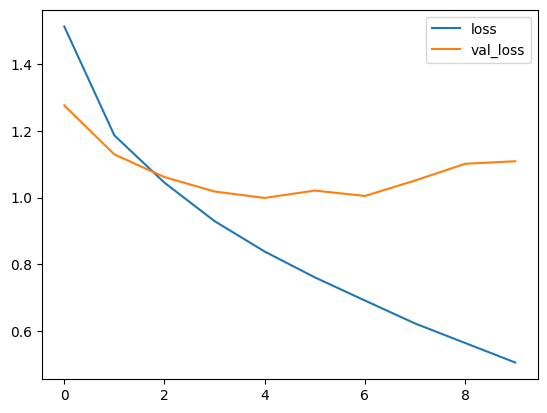

In [84]:
metrics.plot()

In [86]:
predict = model.predict(x_test)
classes_x=np.argmax(predict,axis=1)

313/313 [==============================] - 1s 4ms/step


In [87]:
print(classification_report(y_test,classes_x))
# 67% accuracy  

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1000
           1       0.81      0.77      0.79      1000
           2       0.61      0.52      0.56      1000
           3       0.44      0.56      0.49      1000
           4       0.61      0.62      0.62      1000
           5       0.64      0.44      0.52      1000
           6       0.75      0.76      0.75      1000
           7       0.69      0.74      0.72      1000
           8       0.79      0.77      0.78      1000
           9       0.68      0.79      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



<Axes: >

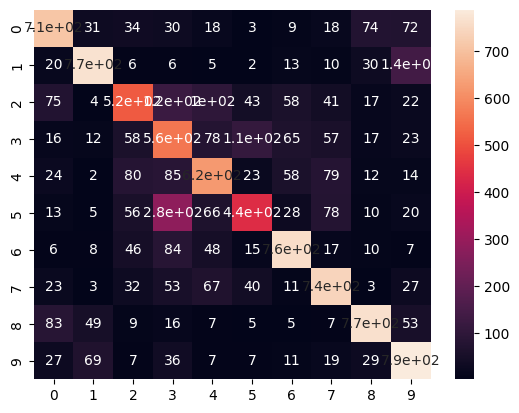

In [91]:
sns.heatmap(confusion_matrix(y_test,classes_x),annot=True)
# we can see where we are facing problems with the classification of the data.

# CNN on Custom Images

In [95]:
data_dir = r'C:\Users\karan\Documents\Untitled Folder\cell_images'

In [96]:
os.listdir(data_dir)

['test', 'train']

In [101]:
test_path = data_dir+'\\test\\'  
train_path = data_dir+'\\train\\' 

In [104]:
para_cell_image=train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'

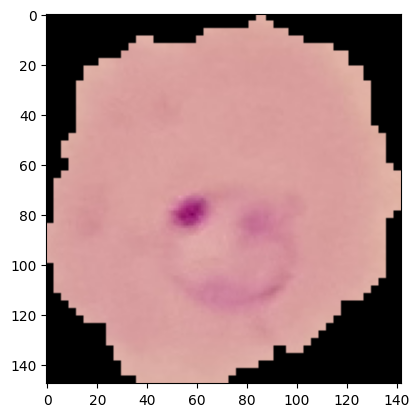

In [106]:
plt.imshow(imread(para_cell_image))
# How an infected cell looks like from a parasite infections

In [107]:
uninfected_cell_image=train_path+'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'

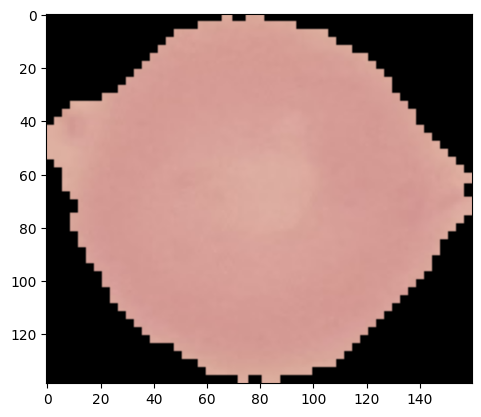

In [108]:
plt.imshow(imread(uninfected_cell_image))

In [109]:
dim1=[]
dim2=[]
# as we have to check whtehr the dimensions of the images are equal or not 
for i in os.listdir(test_path+'uninfected\\'):
    img=imread(test_path+'uninfected\\'+i)
    d1,d2,colors=img.shape
    dim1.append(d1)
    dim2.append(d2)
    # here we know that the 3rd dimesnion is of color which is 3 for all the dataset.
# This is important as the convolutional neural netywrok is not able to train on various 
# sizes and therefore we need to match the sizes of the images.
# we need to choose the actual size to whioch we need to sclae them

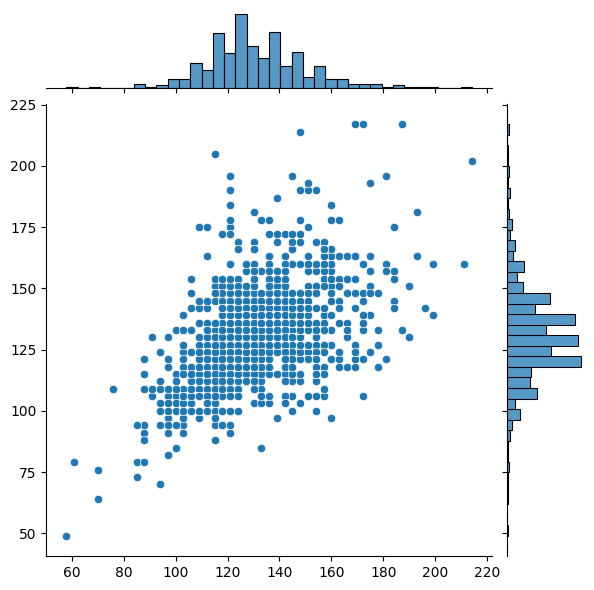

In [115]:
sns.jointplot(x=dim1,y=dim2)

In [116]:
# we can make this choice as of now by taking the mean of the data, but instead of mean there are
# various other ways we can choose the dimesions.
np.mean(dim1)

130.92538461538462

In [117]:
np.mean(dim2)

130.75

In [118]:
# so we are choosing 131 as the image size for our data.

In [119]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [122]:
image_gen = ImageDataGenerator(rotation_range=20,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range==0.1,horizontal_flip=True,fill_mode=='nearest') # fill mode
# here tells us that if we are zooming in the image we want that the value for the new created cless should be equal to near values or
# should be filled with 0's.

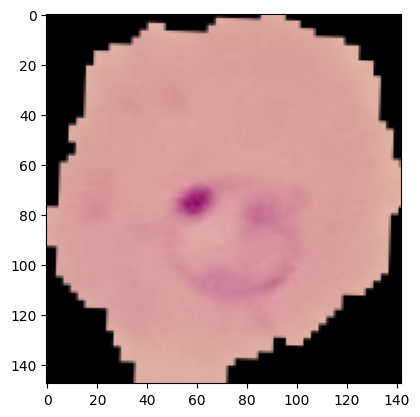

In [126]:
plt.imshow(image_gen.random_transform(imread(para_cell_image)))
# here we see that the image have been transformed.
# and using this we can increase the dataset images.

In [127]:
image_gen.flow_from_directory(train_path)
# For this method to work the images must be sorted down in folders representing classess.

Found 24958 images belonging to 2 classes.


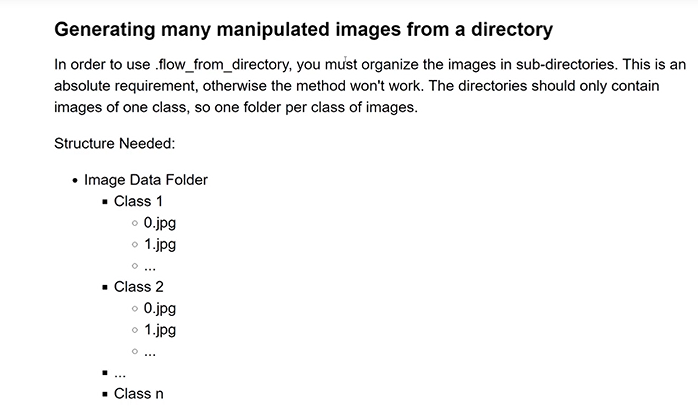

In [144]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(131,131,3),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(131,131,3),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(131,131,3),activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [145]:
 model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 129, 129, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 14, 64)      

In [137]:
train_image_gen = image_gen.flow_from_directory(train_path,target_size=(131,131),color_mode='rgb',batch_size=32,class_mode='binary',) 

Found 24958 images belonging to 2 classes.


In [138]:
test_image_gen = image_gen.flow_from_directory(test_path,target_size=(131,131),color_mode='rgb',batch_size=32,class_mode='binary',shuffle=False) 

Found 2600 images belonging to 2 classes.


In [139]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [146]:
results= model.fit(train_image_gen,epochs=10,validation_data=test_image_gen,callbacks=[early_stop])

Epoch 1/10
780/780 [==============================] - 188s 240ms/step - loss: 1.8436 - val_loss: 0.6767
Epoch 2/10
780/780 [==============================] - 186s 238ms/step - loss: 0.6702 - val_loss: 0.6754
Epoch 3/10
780/780 [==============================] - 186s 239ms/step - loss: 0.6620 - val_loss: 0.6669
Epoch 4/10
780/780 [==============================] - 186s 239ms/step - loss: 0.6545 - val_loss: 0.6638
Epoch 5/10
780/780 [==============================] - 187s 239ms/step - loss: 0.6637 - val_loss: 0.6544
Epoch 6/10
780/780 [==============================] - 186s 238ms/step - loss: 0.4982 - val_loss: 0.2802
Epoch 7/10
780/780 [==============================] - 186s 238ms/step - loss: 0.2179 - val_loss: 0.2086
Epoch 8/10
780/780 [==============================] - 186s 239ms/step - loss: 0.2010 - val_loss: 0.1903
Epoch 9/10
780/780 [==============================] - 186s 239ms/step - loss: 0.1721 - val_loss: 0.1583
Epoch 10/10
780/780 [==============================] - 186s 239m

In [147]:
# HEnce here we have obtained the results for the model that we have created so far.
metrics=pd.DataFrame(model.history.history)

<Axes: >

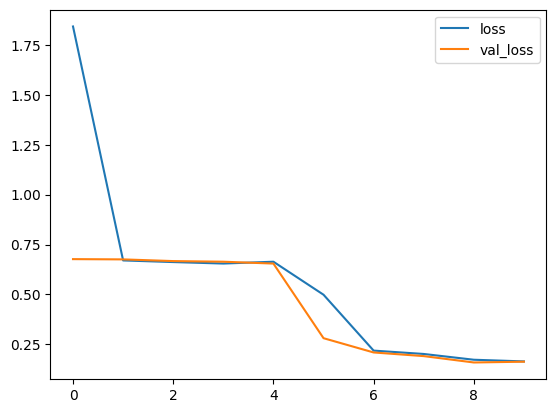

In [148]:
metrics.plot()
# It suggest that we could have trained the model a little bit more.

In [149]:
predict=model.predict(test_image_gen)

82/82 [==============================] - 8s 94ms/step


In [150]:
predictions = predict>0.5 # this 0.5 varies as we only got a probbaility.
# getting true and false which we can alos get though 

In [151]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1300
           1       0.92      0.97      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [154]:
print(confusion_matrix(test_image_gen.classes,predictions))
# we get very good accuracy that basically assit the doctors.

[[1195  105]
 [  36 1264]]
